# Regla trapezoidal
tengamos la integral de la forma
$$
I[a,b] = \int_a^b f[x) dx
$$




In [2]:
import numpy as np

# la funcion que usaremos en este ejemplo
f = np.cos

a = -np.pi
b = np.pi

se suele utilzar un $N$ cantidad de subdivisiones,
En lugar de utilizar rectangulos se usan trapezoides de ancho $h$

$$ h  = \frac{b-a}{N}$$


In [4]:
N = 100

h = (b - a)/N
h

0.06283185307179587

y tiene dos puntos de altura, a mano derecha:
$$ a + kh \rightarrow f[a+kh]$$

a mano derecha del $k$ trapezoide:
$$ a + kh - h\rightarrow f[a+k(h-1)]$$

entonces el area de un trapezoide:
$$
A_k = \frac{h}{2} [f[a+k(h-1)] + f[a+kh]]
$$
donde reordenando veremos terminos repetidos excepto por los extremos
$$
I[a,b] \approx \sum A_k = h (\frac{f[a]}{2} + \frac{f[b]}{2} + \sum_{k=1}^{N-1} f[a + kh] )
$$

In [7]:
ak = 0.5 * ( f(a) + f(b) ) # expresamos las constntes

for k in range(1,N): #la sumatoria
    ak += f(a + k*h)

ak = h * ak #multiplicando por el step size

print('La intergal da:', ak)
# para el coseno usado es 0, notese que es un valor menor a 1e-16

La intergal da: -6.278163296415537e-17


# Implementacion rapida de usar

In [11]:
import numpy as np

def trapezoidal(f, a, b, N=101):
    h = (b-a)/N
    ak = 0.5 * ( f(a) + f(b) ) # expresamos las constntes

    for k in range(1,N): #la sumatoria
        ak += f(a + k*h)

    return h * ak #multiplicando por el step size

def trapezoidal_points(yn, kernel, a, b, N=101):
    h = (b-a)/N
    ak = 0.5 * ( yn[-1] + yn[0] ) # expresamos las constntes

    for k in range(1,N): #la sumatoria
        ak += yn[k] * kernel(a + k * h)

    return h * ak #multiplicando por el step size

N/4: 500


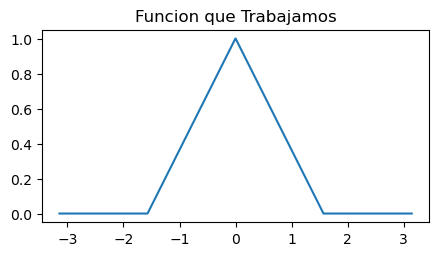

In [9]:
# definir la funcion / Ingresar datos
# definimos la funcion creando un domain
import numpy as np 
import matplotlib.pyplot as plt

dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
#print("x:",x)

N = len(x)
#print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
#print("T:", T, "= 2 pi")

Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

yn = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
yn[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
yn[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)

# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,yn)
plt.show()




In [15]:

T = 2*np.pi
kernel = lambda x: np.cos(2 * np.pi * x/ T)

trapezoidal_points(yn, kernel, 0 , T)

0.0

### uso en las series de fourier
para el caso $k\neq 0$
$$
\int^T \cos[\omega k x] \cos[\omega \kappa x] dx = \frac{T}{2} \delta_{k \kappa}
$$

In [17]:
ff = lambda x: np.cos(x) * np.cos(x)
T = 2*np.pi

trapezoidal(ff, 0, T) 

3.141592653589792

para el caso $k=  0$
$$
\int^T \cos[\omega k x] \cos[\omega \kappa x] dx = T \delta_{k \kappa}
$$

In [6]:
# que pasa al hacerlos calzar con k=0
# en este caso es el doble, por tanto hemos de dividir en su producto puntp
ff = lambda x: np.cos(x*0) * np.cos(x*0)
T = 2*np.pi


trapezoidal(ff, 0, T)

6.283185307179586